In [1]:
"""
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

"""

'\n0. Описать задачу словами\n1. Прочитать данные\n2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.\n3. Обработать пропущенные значения (или убедиться, что их нет)\n4. Обработать категориальные признаки\n5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)\n6. Разбить данные на обучающую и тестовую выборки\n7. Запустить классификатор ближайших соседей (попробовать разное их количество)\n8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы\n9. По желанию: запустить другие классификаторы. Сравнить результаты\n10. По желанию: как-то побороться с несбалансированностью классов (если она есть)\n11. По желанию: исключить коррелированные переменные (объяснить зачем)\n12. Сделать общие выводы\n\n'

In [2]:
"""

Рост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока.
Набор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.


Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income
"""

'\n\nРост числа супермаркетов в большинстве населенных городов увеличивается, и конкуренция на рынке также высока. \nНабор данных представляет собой один из исторических данных о продажах компании-супермаркета, который был зарегистрирован в 3 различных филиалах за 3 месяца.\n\n\nInvoice id: Computer generated sales slip invoice identification number\n\nBranch: Branch of supercenter (3 branches are available identified by A, B and C).\n\nCity: Location of supercenters\n\nCustomer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.\n\nGender: Gender type of customer\n\nProduct line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel\n\nUnit price: Price of each product in $\n\nQuantity: Number of products purchased by customer\n\nTax: 5% tax fee for customer buying\n\nTotal: Total price including tax\n\nDate: Date of purc

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix

In [4]:
features=pd.read_csv("features.csv")
store=pd.read_csv("stores.csv")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data=pd.merge(data,store,on=['Store'],how='inner')
data.head(10)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
5,1,2010-03-12,1439541.59
6,1,2010-03-19,1472515.79
7,1,2010-03-26,1404429.92
8,1,2010-04-02,1594968.28
9,1,2010-04-09,1545418.53


In [21]:
print(data.info)

<bound method DataFrame.info of       Store        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0         1  2010-02-05    1643690.90        42.31       2.572  211.096358   
1         1  2010-02-12    1641957.44        38.51       2.548  211.242170   
2         1  2010-02-19    1611968.17        39.93       2.514  211.289143   
3         1  2010-02-26    1409727.59        46.63       2.561  211.319643   
4         1  2010-03-05    1554806.68        46.50       2.625  211.350143   
...     ...         ...           ...          ...         ...         ...   
6430     45  2012-09-28     713173.95        64.88       3.997  192.013558   
6431     45  2012-10-05     733455.07        64.89       3.985  192.170412   
6432     45  2012-10-12     734464.36        54.47       4.000  192.327265   
6433     45  2012-10-19     718125.53        56.47       3.969  192.330854   
6434     45  2012-10-26     760281.43        58.85       3.882  192.308899   

      Unemployment    Size  Hol

In [ ]:
sns.countplot(x="Type", data=data)

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

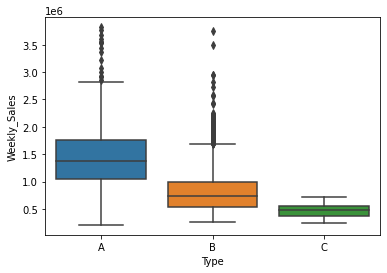

In [9]:
sns.boxplot(x='Type',y='Weekly_Sales',data=data)

<AxesSubplot:ylabel='Frequency'>

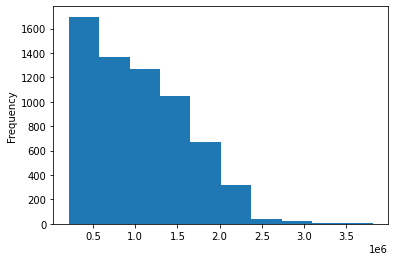

In [10]:
data["Weekly_Sales"].plot.hist()

<AxesSubplot:xlabel='IsHoliday', ylabel='count'>

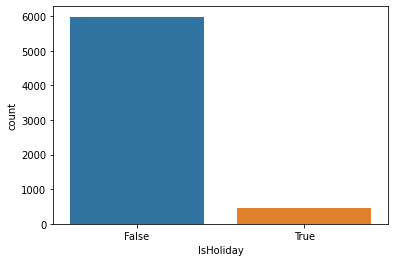

In [11]:
sns.countplot(x="IsHoliday", data=data)

In [12]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

In [13]:
"""
Признаки 'MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5' имеют большое кол-во признаков
Использовать их не представляется возможным, поэтому придется удалить.
"""

data=data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

In [14]:
data['Holiday']=[int(i) for i in list(data.IsHoliday)]

In [15]:
Type_dummy=pd.get_dummies(data['Type'],drop_first=True)
data=pd.concat([data,Type_dummy],axis=1)
data=data.drop(['Type','IsHoliday'],axis=1)

In [16]:
X=data.drop(['Weekly_Sales','Store','Date', "B", "C"],axis=1)
y=data['Weekly_Sales']

In [17]:
nom_cols=[8]

scale_cols=[0,3]

In [18]:
transf = make_column_transformer((OneHotEncoder(sparse=False,drop='first'), nom_cols),
                                 (StandardScaler(), scale_cols),
                                 remainder='passthrough')
transf

lab = LabelEncoder()
y = lab.fit_transform(y)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn_c = KNeighborsRegressor(n_neighbors=14)
knn_c.fit(x_train, y_train)
y_pred_knn=knn_c.predict(x_val)
acc_knn= round(knn_c.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_knn)

Accuracy: 95 % 



In [23]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=150)
clf_rf.fit(x_train, y_train)
y_pred_rf=clf_rf.predict(x_val)
acc_rf= round(clf_rf.score(x_train, y_train) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [20]:
"""
Общие выводы:
Задача хорошо подходит для регрессии - при определенной предобработке можно достичь хороших значений в точности
при том, что некоторые неудобства доставляет формат хранения и большое количество пропущенных значений для некоторых
признаков. Из всех испытанных методов (SVC, Linear Regression, KNN), наилучший результат показал Случайный Лес.
"""
